In [87]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, auc, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, balanced_accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report
%matplotlib inline

In [88]:
# reading in our training dataset
trainData1 = pd.read_csv('train_balanced.csv')

In [89]:
# reading in our test dataset
testData1 = pd.read_csv('test_imbalanced.csv')

In [90]:
# creating a copy of our training data to work with
trainData = trainData1

In [91]:
trainData.head()

,sport,dsport,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,...,service_ssl,ct_ftp_cmd_1,ct_ftp_cmd_2,ct_ftp_cmd_3,ct_ftp_cmd_4,ct_ftp_cmd_5,ct_ftp_cmd_6,ct_ftp_cmd_8,ct_ftp_cmd_,attack_cat_code
0,10489,80,1.022072,1684,10168,31,29,3,5,1.224180e+04,...,0,0,0,0,0,0,0,0,0,0
1,45407,49933,0.031687,3390,42080,31,29,7,22,8.407234e+05,...,0,0,0,0,0,0,0,0,1,0
2,3580,5190,0.004627,1036,2262,31,29,4,4,1.642533e+06,...,0,0,0,0,0,0,0,0,1,0
3,12088,38550,0.465485,4912,3080,31,29,7,7,8.141186e+04,...,0,0,0,0,0,0,0,0,1,0
4,0,0,50.004350,384,0,1,0,0,0,5.119555e+01,...,0,0,0,0,0,0,0,0,1,0


In [92]:
# creating a copy of the test dataset
testData = testData1

In [93]:
testData.head()

,sport,dsport,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,...,service_ssl,ct_ftp_cmd_1,ct_ftp_cmd_2,ct_ftp_cmd_3,ct_ftp_cmd_4,ct_ftp_cmd_5,ct_ftp_cmd_6,ct_ftp_cmd_8,ct_ftp_cmd_,attack_cat_code
0,38958,45902,0.359147,4968,3080,31,29,7,7,106719.53,...,0,0,0,0,0,0,0,0,1,0
1,31605,25,0.739785,37172,3276,31,29,18,8,394255.10,...,0,0,0,0,0,0,0,0,0,0
2,57966,5190,0.163250,1272,2572,31,29,4,4,58462.48,...,0,0,0,0,0,0,0,0,0,0
3,47439,53,0.000008,114,0,254,0,0,0,57000000.00,...,0,0,0,0,0,0,0,0,1,1
4,18008,53,0.001029,146,178,31,29,0,0,567541.30,...,0,0,0,0,0,0,0,0,0,0


In [94]:
# splitting to features and target
x_mul = trainData.drop(['attack_cat_code'], axis=1)
y_mul = trainData['attack_cat_code']

In [95]:
x_test_mul = testData.drop(['attack_cat_code'], axis=1)
y_test_mul = testData['attack_cat_code']

In [96]:
categories = {'Normal':0,
             'Generic':1,
             'Exploits':2,
             'Fuzzers':3,
             'DoS':4,
             'Reconnaissance':5,
             'Analysis':6,
             'Backdoor':7,
             'Shellcode':8,
             'Worms':9}

In [97]:
labels = [cat for cat in categories.keys()]
labels

['Normal',
 'Generic',
 'Exploits',
 'Fuzzers',
 'DoS',
 'Reconnaissance',
 'Analysis',
 'Backdoor',
 'Shellcode',
 'Worms']

# Multi-class - All Features

In [98]:
# splitting into train and validation sets (all features now)
x_train_mul, x_val_mul, y_train_mul, y_val_mul = train_test_split(
x_mul, y_mul, test_size=0.2, random_state=42, stratify=y_mul)

In [99]:
x_train_mul.shape, x_val_mul.shape, y_train_mul.shape, y_val_mul.shape

((1551464, 207), (387866, 207), (1551464,), (387866,))

In [100]:
x_test_mul.shape, y_test_mul.shape

((253974, 207), (253974,))

In [101]:
# using standard scaler
sscaler = StandardScaler()
x_train_mulstd = sscaler.fit_transform(x_train_mul)
x_val_mulstd = sscaler.transform(x_val_mul)
x_test_mulstd = sscaler.transform(x_test_mul)

In [102]:
model = LogisticRegression(solver='newton-cg', multi_class='multinomial')

In [103]:
# fit the model
model.fit(x_train_mulstd, y_train_mul)

/Users/temidayo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [104]:
y_val_mul_pred = model.predict(x_val_mulstd)
y_test_mul_pred = model.predict(x_test_mulstd)

In [109]:
# accuracy scores of dataset
val_acc = accuracy_score(y_val_mul, y_val_mul_pred)
test_acc = accuracy_score(y_test_mul, y_test_mul_pred)

In [110]:
# function to plot confusion matrix
def plotConfMatrix(ymul, ymul_pred, data_acc, dataset):
    conf_matrix = confusion_matrix(ymul, ymul_pred, normalize='true')

    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title((dataset + ' Accuracy Score: {0}%\n').format('%.2f' % (data_acc*100.0)), size=14)
    ax.set_ylabel('Target')
    ax.set_xlabel('Prediction')

    sns.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cbar=False, square=True,
               fmt='.2f', linewidths=0.1, cmap='Greens', ax=ax)
    plt.tight_layout()
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()
    
    print('Classification Report:')
    print(classification_report(ymul, ymul_pred, target_names=labels))

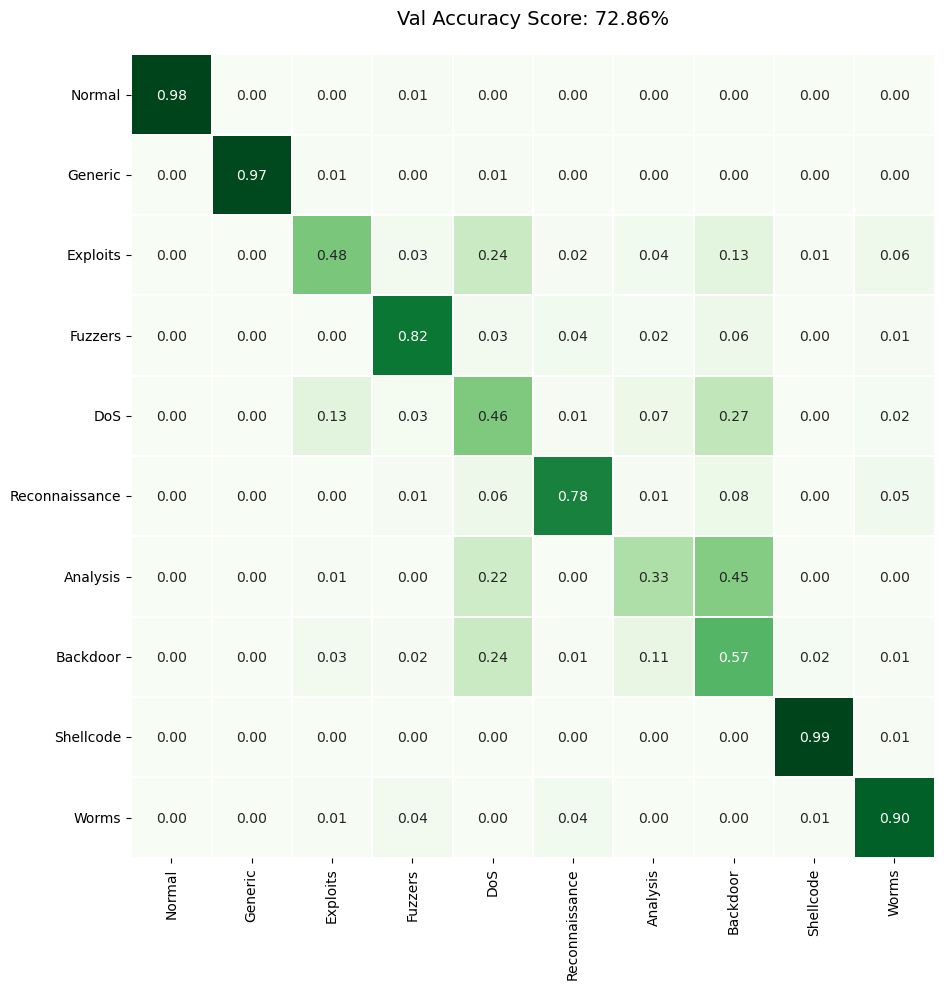

Classification Report:
                precision    recall  f1-score   support

        Normal       1.00      0.98      0.99     38786
       Generic       0.99      0.97      0.98     38786
      Exploits       0.71      0.48      0.57     38787
       Fuzzers       0.86      0.82      0.84     38787
           DoS       0.37      0.46      0.41     38787
Reconnaissance       0.86      0.78      0.82     38786
      Analysis       0.56      0.33      0.41     38787
      Backdoor       0.36      0.57      0.44     38787
     Shellcode       0.96      0.99      0.97     38786
         Worms       0.84      0.90      0.87     38787

      accuracy                           0.73    387866
     macro avg       0.75      0.73      0.73    387866
  weighted avg       0.75      0.73      0.73    387866



In [111]:
# plotting confusion matrix for validation dataset
plotConfMatrix(y_val_mul, y_val_mul_pred, val_acc, 'Val')

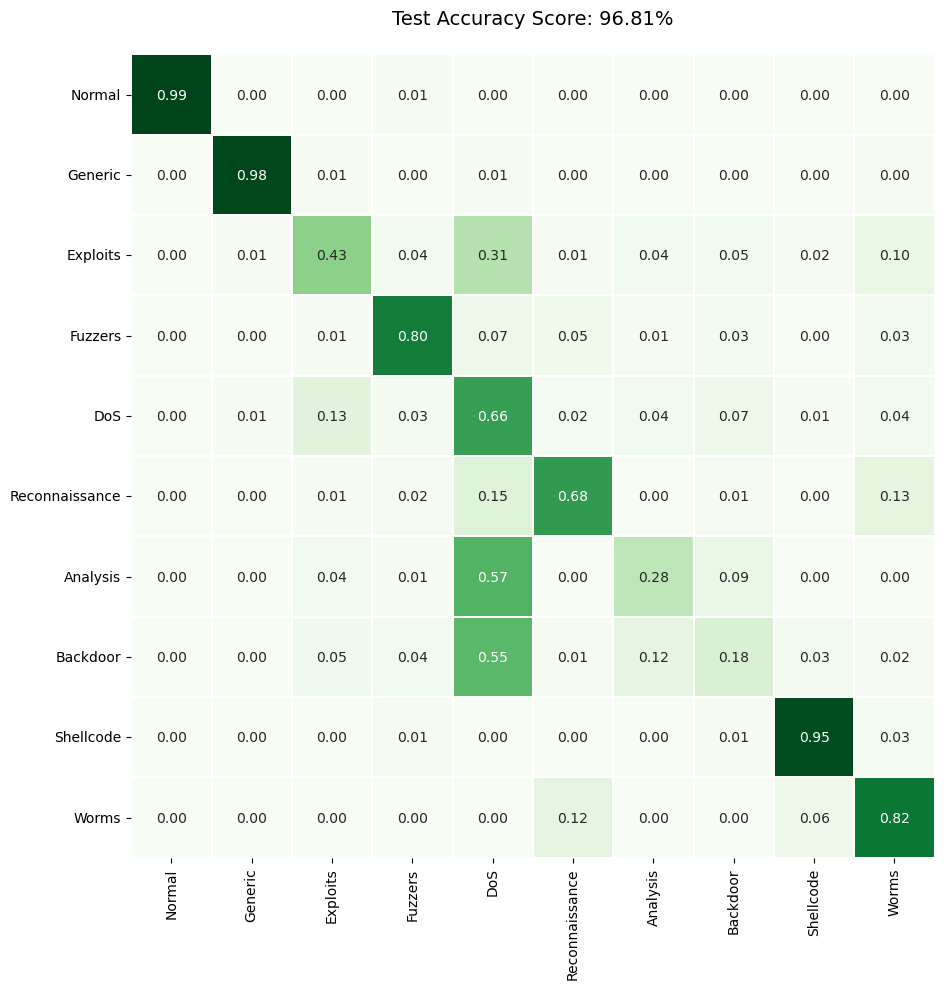

Classification Report:
                precision    recall  f1-score   support

        Normal       1.00      0.99      0.99    221846
       Generic       1.00      0.98      0.99     21548
      Exploits       0.77      0.43      0.55      4452
       Fuzzers       0.43      0.80      0.56      2425
           DoS       0.33      0.66      0.44      1635
Reconnaissance       0.65      0.68      0.66      1399
      Analysis       0.10      0.28      0.15       268
      Backdoor       0.07      0.18      0.10       233
     Shellcode       0.54      0.95      0.69       151
         Worms       0.02      0.82      0.03        17

      accuracy                           0.97    253974
     macro avg       0.49      0.68      0.52    253974
  weighted avg       0.98      0.97      0.97    253974



In [112]:
# plotting confusion matrix for test dataset
plotConfMatrix(y_test_mul, y_test_mul_pred, test_acc, 'Test')

In [114]:
!pip install prettytable

In [117]:
# function to get f1 score, balance accuracy, precision, recall and accuracy
def getMetrics(ymul, ymul_pred, dataset):
    data_f1 = f1_score(ymul, ymul_pred, average='weighted')
    data_bal_acc = balanced_accuracy_score(ymul, ymul_pred)
    data_precision = precision_score(ymul, ymul_pred, average='weighted')
    data_recall = recall_score(ymul, ymul_pred, average='weighted')
    data_acc = accuracy_score(ymul, ymul_pred)
    
    from prettytable import PrettyTable

    result =  PrettyTable()
    result.field_names = ['Dataset', 'Model', 'F1-score', 
                          'Accuracy', 'Balanced Accuracy', 'Precision', 'Recall']
    result.add_row([dataset, 'Logistic Regression', '{:.2f}%'.format(data_f1), 
                    '{:.2f}%'.format(data_acc), '{:.2f}%'.format(data_bal_acc), 
                    '{:.2f}%'.format(data_precision), '{:.2f}%'.format(data_recall)])
    print(result)

In [118]:
# getting metrics for validation dataset
getMetrics(y_val_mul, y_val_mul_pred, 'Val')

+---------+---------------------+----------+----------+-------------------+-----------+--------+
| Dataset |        Model        | F1-score | Accuracy | Balanced Accuracy | Precision | Recall |
+---------+---------------------+----------+----------+-------------------+-----------+--------+
|   Val   | Logistic Regression |  0.73%   |  0.73%   |       0.73%       |   0.75%   | 0.73%  |
+---------+---------------------+----------+----------+-------------------+-----------+--------+


In [119]:
# getting metrics for test dataset
getMetrics(y_test_mul, y_test_mul_pred, 'Test')

+---------+---------------------+----------+----------+-------------------+-----------+--------+
| Dataset |        Model        | F1-score | Accuracy | Balanced Accuracy | Precision | Recall |
+---------+---------------------+----------+----------+-------------------+-----------+--------+
|   Test  | Logistic Regression |  0.97%   |  0.97%   |       0.68%       |   0.98%   | 0.97%  |
+---------+---------------------+----------+----------+-------------------+-----------+--------+
